In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

In [25]:
df = pd.read_csv('ob2023.csv')
df.head()

,nofarmasi,resep,nama_brg,jumlah,tglsave
0,2300000001,1.0,ASAM MEFENAMAT 500MG TAB GEN,10.0,2023-01-01 00:48:21
1,2300000001,1.0,CEFIXIME 100MG CAP GEN+,10.0,2023-01-01 00:48:21
2,2300000002,2.0,SENSIPAD 60 X 90,2.0,2023-01-01 00:59:54
3,2300000002,2.0,PAMPERS DEWASA L,2.0,2023-01-01 00:59:54
4,2300000003,3.0,DIKLOVIT,10.0,2023-01-01 02:00:00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357037 entries, 0 to 357036
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   nofarmasi  357037 non-null  int64  
 1   resep      357037 non-null  float64
 2   nama_brg   357037 non-null  object 
 3   jumlah     357037 non-null  float64
 4   tglsave    357037 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.6+ MB


In [27]:
df['nofarmasi']=='0DOT'


0         False
1         False
2         False
3         False
4         False
          ...  
357032    False
357033    False
357034    False
357035    False
357036    False
Name: nofarmasi, Length: 357037, dtype: bool

In [28]:
# Null data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357037 entries, 0 to 357036
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   nofarmasi  357037 non-null  int64  
 1   resep      357037 non-null  float64
 2   nama_brg   357037 non-null  object 
 3   jumlah     357037 non-null  float64
 4   tglsave    357037 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.6+ MB


In [29]:
df['nofarmasi'] = df['nofarmasi'].astype('Int64')

In [30]:
# Normalisasi format data nama_brg
df['nama_brg'] = df['nama_brg'].str.lower()
df['nama_brg'] = df['nama_brg'].str.strip()



In [31]:
# Memecah format date-time

df['Datetime'] = pd.to_datetime(df['tglsave'])


In [32]:
df['date'] = df['Datetime'].dt.date
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.weekday
df['hour'] = df['Datetime'].dt.hour


df['day'] = df['day'].replace((0,1,2,3,4,5,6), 
('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

In [33]:
df.drop(columns='tglsave',inplace=True)

In [34]:
df.head(100)


,nofarmasi,resep,nama_brg,jumlah,Datetime,date,month,day,hour
0,2300000001,1.0,asam mefenamat 500mg tab gen,10.0,2023-01-01 00:48:21,2023-01-01,1,Sunday,0
1,2300000001,1.0,cefixime 100mg cap gen+,10.0,2023-01-01 00:48:21,2023-01-01,1,Sunday,0
2,2300000002,2.0,sensipad 60 x 90,2.0,2023-01-01 00:59:54,2023-01-01,1,Sunday,0
3,2300000002,2.0,pampers dewasa l,2.0,2023-01-01 00:59:54,2023-01-01,1,Sunday,0
4,2300000003,3.0,diklovit,10.0,2023-01-01 02:00:00,2023-01-01,1,Sunday,2
...,...,...,...,...,...,...,...,...,...
95,2300000020,20.0,methylprednisolon 4mg tab gen+,10.0,2023-01-01 11:14:47,2023-01-01,1,Sunday,11
96,2300000020,20.0,asam mefenamat 500mg tab gen,10.0,2023-01-01 11:14:47,2023-01-01,1,Sunday,11
97,2300000020,20.0,spasmolit tab,10.0,2023-01-01 11:14:47,2023-01-01,1,Sunday,11
98,2300000021,21.0,sanmol 500mg tab,12.0,2023-01-01 11:19:14,2023-01-01,1,Sunday,11


C:\Users\PSI\AppData\Local\Temp\ipykernel_8508\1162552508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByHour['hour'], y=countByHour['nofarmasi'], palette = colors)
C:\Users\PSI\AppData\Local\Temp\ipykernel_8508\1162552508.py:9: UserWarning: 
The palette list has fewer values (18) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=countByHour['hour'], y=countByHour['nofarmasi'], palette = colors)


<Axes: xlabel='hour', ylabel='nofarmasi'>

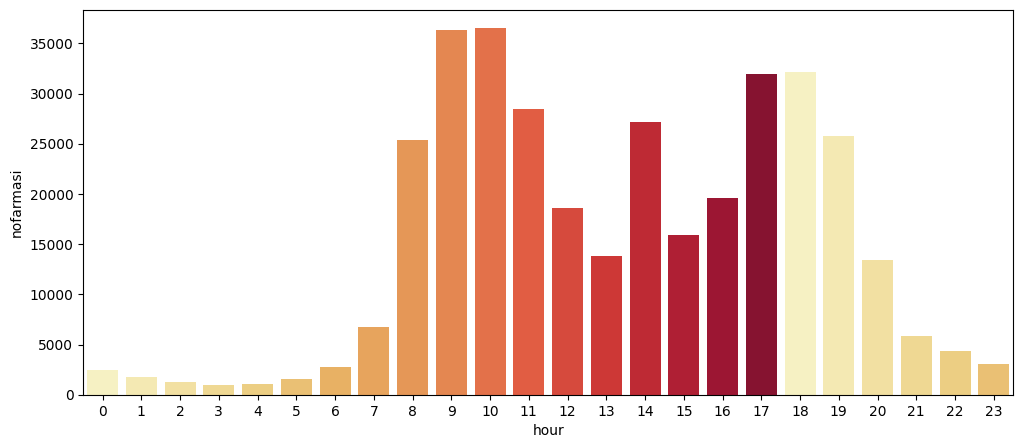

In [35]:
# Exploratory Analysis
# Transaksi berdasarkan jam

countByHour = df.groupby('hour')['nofarmasi'].count().reset_index()
countByHour.sort_values('hour',inplace=True)

colors = sns.color_palette("YlOrRd", 18)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByHour['hour'], y=countByHour['nofarmasi'], palette = colors)


C:\Users\PSI\AppData\Local\Temp\ipykernel_8508\3451754424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByDay['day'], y=countByDay['nofarmasi'], palette = colors)


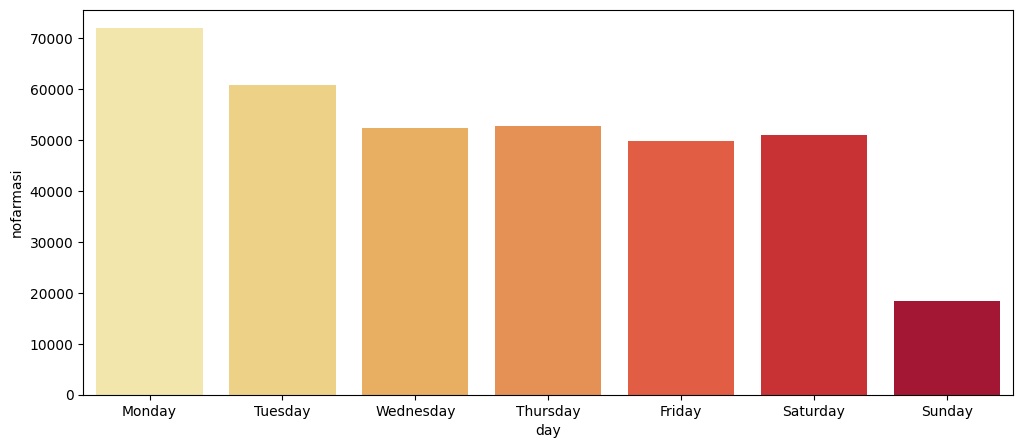

In [36]:
# Transaksi per hari dalam seminggu

countByDay = df.groupby('day')['nofarmasi'].count().reset_index()
countByDay.loc[:,"orderOfDays"] = [4,0,5,6,3,1,2]
countByDay.sort_values("orderOfDays",inplace=True)

colors = sns.color_palette("YlOrRd", 7)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByDay['day'], y=countByDay['nofarmasi'], palette = colors)
plt.show()

C:\Users\PSI\AppData\Local\Temp\ipykernel_8508\814690485.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countByMonth['month'], y=countByMonth['nofarmasi'], palette = colors)


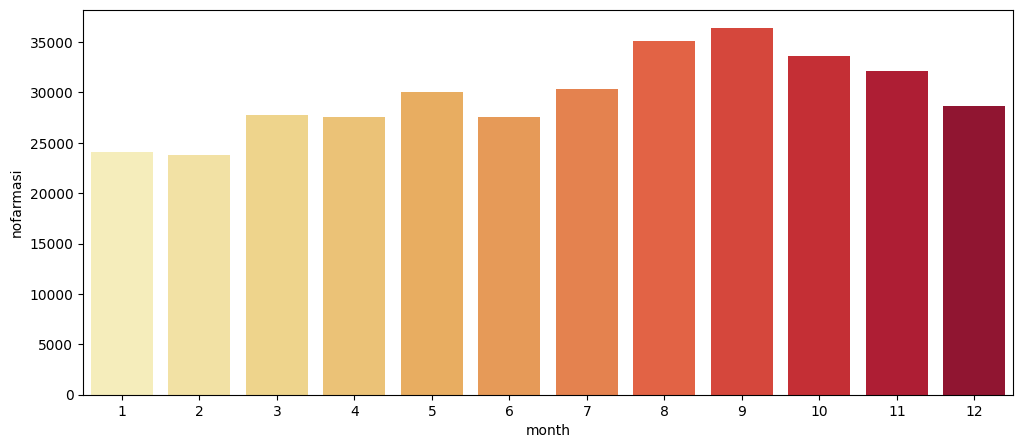

In [37]:
# Transaksi berdasarkan Bulan

countByMonth = df.groupby('month')['nofarmasi'].count().reset_index()
countByMonth.sort_values('month',inplace=True)


colors = sns.color_palette("YlOrRd", 12)
fig = plt.figure(figsize=(12,5))
sns.barplot(x=countByMonth['month'], y=countByMonth['nofarmasi'], palette = colors)
plt.show()

C:\Users\PSI\AppData\Local\Temp\ipykernel_8508\821449361.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = names, y = values, palette = colors)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'mecobalamin 500mcg cap (jkn)'),
  Text(1, 0, 'lansoprazole 30mg cap (jkn)'),
  Text(2, 0, 'diazepam 5 mg tab gen+'),
  Text(3, 0, 'cetirizine 10mg caps gen+'),
  Text(4, 0, 'candesartan 8mg tab (jkn)'),
  Text(5, 0, 'guaifenesin (gg) 100mg tab gen'),
  Text(6, 0, 'cefixime 100mg cap gen+'),
  Text(7, 0, 'lansoprazole 30mg cap gen+'),
  Text(8, 0, 'miniaspi 80 mg tab (jkn)'),
  Text(9, 0, 'natrium diklofenak 50 mg tab'),
  Text(10, 0, 'folic acid 1 mg tab'),
  Text(11, 0, 'methylprednisolon 4mg tab gen+'),
  Text(12, 0, 'cortidex tab'),
  Text(13, 0, 'metamizole 500mg tab (jkn)'),
  Text(14, 0, 'relaxon 50mg tab (jkn)'),
  Text(15, 0, 'tremensa tab'),
  Text(16, 0, 'paracetamol 500mg tab (jkn)'),
  Text(17, 0, 'meloxicam 15mg tab (jkn)'),
  Text(18, 0, 'chlorpeniramin maleat 4mg tab'),
  Text(19, 0, 'atorvastatin 20mg gen+'),
  Text(2

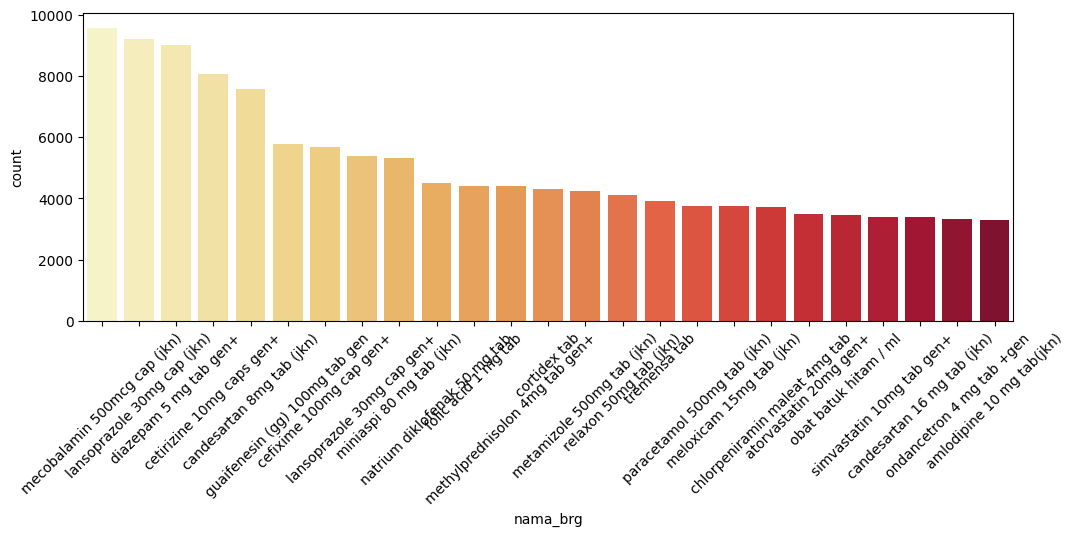

In [38]:
# Top 25 item terlaris

fig = plt.figure(figsize=(12,4))
colors = sns.color_palette("YlOrRd", 25)
names = df.nama_brg.value_counts().head(25).index
values = df.nama_brg.value_counts().head(25)
sns.barplot(x = names, y = values, palette = colors)
plt.xticks(rotation=45)



In [39]:
# Apriori
# Transformasi dataset

nofarmasis = df.groupby(['nofarmasi', 'nama_brg'])['nama_brg'].count().reset_index(name='Number of nama_brgs')
table = nofarmasis.pivot_table(index='nofarmasi', columns='nama_brg', values='Number of nama_brgs', 
aggfunc='sum').fillna(0)
table.head()

nama_brg,-,--,10 hole stright plate,7,acarbose 100 mg tablet,acarbose 100 mg tablet (jkn),acarbose 100 mg tablet gen+,acarbose 50 mg tab (jkn),acarbose 50 mg tab gen+,acarbose tab 50 mg gen+,...,vosedon tablet,vostrin 300 mg,xarelto 10 mg tablet,xepazym kaplet,zelface 20 % cream 10 gram,zinc 20 mg tab,zinc sirup 20 mg/5 ml botol 60,zinci oxydum / gr,zircum kid 20mg/5ml syr,zitanid 2mg tab
nofarmasi,,,,,,,,,,,,,,,,,,,,,
2300000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Encoding

def hot_encode(x): 
 if(x==0): 
    return 0
 if(x>0): 
    return 1
apriori_data = df.groupby(['nofarmasi','nama_brg'])['nama_brg'].count().reset_index(name ='Count')
apriori_basket = apriori_data.pivot_table(index = 'nofarmasi', columns = 'nama_brg', values = 'Count', aggfunc =
'sum').fillna(0)
apriori_basket_set = apriori_basket.applymap(hot_encode)
apriori_basket_set.head()

C:\Users\PSI\AppData\Local\Temp\ipykernel_8508\2386745605.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  apriori_basket_set = apriori_basket.applymap(hot_encode)


nama_brg,-,--,10 hole stright plate,7,acarbose 100 mg tablet,acarbose 100 mg tablet (jkn),acarbose 100 mg tablet gen+,acarbose 50 mg tab (jkn),acarbose 50 mg tab gen+,acarbose tab 50 mg gen+,...,vosedon tablet,vostrin 300 mg,xarelto 10 mg tablet,xepazym kaplet,zelface 20 % cream 10 gram,zinc 20 mg tab,zinc sirup 20 mg/5 ml botol 60,zinci oxydum / gr,zircum kid 20mg/5ml syr,zitanid 2mg tab
nofarmasi,,,,,,,,,,,,,,,,,,,,,
2300000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
table.drop(['-','--','7'], axis=1)

nama_brg,10 hole stright plate,acarbose 100 mg tablet,acarbose 100 mg tablet (jkn),acarbose 100 mg tablet gen+,acarbose 50 mg tab (jkn),acarbose 50 mg tab gen+,acarbose tab 50 mg gen+,acetylcysteine 200 mg caps,acidum salicylicum pulv,acne feldin lotion,...,vosedon tablet,vostrin 300 mg,xarelto 10 mg tablet,xepazym kaplet,zelface 20 % cream 10 gram,zinc 20 mg tab,zinc sirup 20 mg/5 ml botol 60,zinci oxydum / gr,zircum kid 20mg/5ml syr,zitanid 2mg tab
nofarmasi,,,,,,,,,,,,,,,,,,,,,
2300000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300080157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300080158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2300080159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
apriori_basket_set = apriori_basket_set.drop(['-','--','7'], axis=1)
apriori_basket_set

nama_brg,10 hole stright plate,acarbose 100 mg tablet,acarbose 100 mg tablet (jkn),acarbose 100 mg tablet gen+,acarbose 50 mg tab (jkn),acarbose 50 mg tab gen+,acarbose tab 50 mg gen+,acetylcysteine 200 mg caps,acidum salicylicum pulv,acne feldin lotion,...,vosedon tablet,vostrin 300 mg,xarelto 10 mg tablet,xepazym kaplet,zelface 20 % cream 10 gram,zinc 20 mg tab,zinc sirup 20 mg/5 ml botol 60,zinci oxydum / gr,zircum kid 20mg/5ml syr,zitanid 2mg tab
nofarmasi,,,,,,,,,,,,,,,,,,,,,
2300000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300080157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300080158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2300080159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Pencarian frequent itemset berdasarkan support

frequence = apriori(apriori_basket_set, min_support=0.03, use_colnames=True)
rules = association_rules(frequence, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

d:\191210102\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(metamizole 500mg tab (jkn)),(diazepam 5 mg tab gen+),0.051855,0.110085,0.050602,0.975845,8.864438,0.044894,36.842463,0.935711
0,(obat batuk hitam / ml),(cetirizine 10mg caps gen+),0.042975,0.099577,0.031589,0.735063,7.381878,0.027310,3.398628,0.903354
10,(relaxon 50mg tab (jkn)),(mecobalamin 500mcg cap (jkn)),0.050540,0.118277,0.031965,0.632466,5.347328,0.025987,2.399024,0.856266
6,(diazepam 5 mg tab gen+),(metamizole 500mg tab (jkn)),0.110085,0.051855,0.050602,0.459665,8.864438,0.044894,1.754737,0.996938
9,(lansoprazole 30mg cap (jkn)),(mecobalamin 500mcg cap (jkn)),0.113304,0.118277,0.038465,0.339487,2.870271,0.025064,1.334906,0.734864
4,(diazepam 5 mg tab gen+),(mecobalamin 500mcg cap (jkn)),0.110085,0.118277,0.037063,0.336671,2.846460,0.024042,1.329239,0.728931
8,(mecobalamin 500mcg cap (jkn)),(lansoprazole 30mg cap (jkn)),0.118277,0.113304,0.038465,0.325214,2.870271,0.025064,1.314041,0.739009
1,(cetirizine 10mg caps gen+),(obat batuk hitam / ml),0.099577,0.042975,0.031589,0.317233,7.381878,0.027310,1.401686,0.960141
5,(mecobalamin 500mcg cap (jkn)),(diazepam 5 mg tab gen+),0.118277,0.110085,0.037063,0.313354,2.846460,0.024042,1.296031,0.735703
2,(diazepam 5 mg tab gen+),(lansoprazole 30mg cap (jkn)),0.110085,0.113304,0.030725,0.279099,2.463265,0.018252,1.229982,0.667519


In [44]:
# Pencarian frequent itemset berdasarkan lift

apriori_rules = association_rules(frequence, metric = 'lift', min_threshold = 0.01)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(metamizole 500mg tab (jkn)),(diazepam 5 mg tab gen+),0.051855,0.110085,0.050602,0.975845,8.864438,0.044894,36.842463,0.935711
0,(obat batuk hitam / ml),(cetirizine 10mg caps gen+),0.042975,0.099577,0.031589,0.735063,7.381878,0.027310,3.398628,0.903354
10,(relaxon 50mg tab (jkn)),(mecobalamin 500mcg cap (jkn)),0.050540,0.118277,0.031965,0.632466,5.347328,0.025987,2.399024,0.856266
6,(diazepam 5 mg tab gen+),(metamizole 500mg tab (jkn)),0.110085,0.051855,0.050602,0.459665,8.864438,0.044894,1.754737,0.996938
9,(lansoprazole 30mg cap (jkn)),(mecobalamin 500mcg cap (jkn)),0.113304,0.118277,0.038465,0.339487,2.870271,0.025064,1.334906,0.734864
4,(diazepam 5 mg tab gen+),(mecobalamin 500mcg cap (jkn)),0.110085,0.118277,0.037063,0.336671,2.846460,0.024042,1.329239,0.728931
8,(mecobalamin 500mcg cap (jkn)),(lansoprazole 30mg cap (jkn)),0.118277,0.113304,0.038465,0.325214,2.870271,0.025064,1.314041,0.739009
1,(cetirizine 10mg caps gen+),(obat batuk hitam / ml),0.099577,0.042975,0.031589,0.317233,7.381878,0.027310,1.401686,0.960141
5,(mecobalamin 500mcg cap (jkn)),(diazepam 5 mg tab gen+),0.118277,0.110085,0.037063,0.313354,2.846460,0.024042,1.296031,0.735703
2,(diazepam 5 mg tab gen+),(lansoprazole 30mg cap (jkn)),0.110085,0.113304,0.030725,0.279099,2.463265,0.018252,1.229982,0.667519


In [45]:
fix_rule = apriori_rules[['antecedents', 'consequents']]

In [46]:
fix_rule

,antecedents,consequents
7,(metamizole 500mg tab (jkn)),(diazepam 5 mg tab gen+)
0,(obat batuk hitam / ml),(cetirizine 10mg caps gen+)
10,(relaxon 50mg tab (jkn)),(mecobalamin 500mcg cap (jkn))
6,(diazepam 5 mg tab gen+),(metamizole 500mg tab (jkn))
9,(lansoprazole 30mg cap (jkn)),(mecobalamin 500mcg cap (jkn))
4,(diazepam 5 mg tab gen+),(mecobalamin 500mcg cap (jkn))
8,(mecobalamin 500mcg cap (jkn)),(lansoprazole 30mg cap (jkn))
1,(cetirizine 10mg caps gen+),(obat batuk hitam / ml)
5,(mecobalamin 500mcg cap (jkn)),(diazepam 5 mg tab gen+)
2,(diazepam 5 mg tab gen+),(lansoprazole 30mg cap (jkn))
